# The Product Pricer Continued

A model that can estimate how much something costs, from its description.

## Data Curation Part 2

Today we'll extend our dataset to a greater coverage, and craft it into an excellent dataset for training.

The dataset is here:  
https://huggingface.co/datasets/McAuley-Lab/Amazon-Reviews-2023

And the folder with all the product datasets is here:  
https://huggingface.co/datasets/McAuley-Lab/Amazon-Reviews-2023/tree/main/raw/meta_categories

## The Lite dataset

This notebook is an alternative to `day2.ipynb` that creates a smaller dataset for Home Appliances only, to keep training fast and costs low. You may need to update names of future notebooks to reflect that you have built the "lite" dataset not the full dataset.

In [1]:
# imports

import os
import random
from dotenv import load_dotenv
from huggingface_hub import login
from datasets import load_dataset, Dataset, DatasetDict
from items import Item
from loaders import ItemLoader
import matplotlib.pyplot as plt
from collections import Counter, defaultdict
import numpy as np
import pickle

In [2]:
# environment

load_dotenv()
# os.environ['OPENAI_API_KEY'] = os.getenv('OPENAI_API_KEY', 'your-key-if-not-using-env')
# os.environ['ANTHROPIC_API_KEY'] = os.getenv('ANTHROPIC_API_KEY', 'your-key-if-not-using-env')
#os.environ['HF_TOKEN'] = os.getenv('HF_TOKEN', 'your-key-if-not-using-env')

# Replacing above with gem
load_dotenv(override=True)
api_key = os.getenv('OPENAI_API_KEY')

if api_key and api_key.startswith('sk-proj-') and len(api_key)>10:
    print("API key looks good so far")
else:
    print("There might be a problem with your API key? Please visit the troubleshooting notebook!")

There might be a problem with your API key? Please visit the troubleshooting notebook!


In [26]:
# Need to replace hard coded below

In [ ]:

# Log in to HuggingFace
# For what ever reason, code not working when calling valid hr toekn from env, 
# so hard coding into code, then removing after run.
# -- Need to replace hard coded below --
hardcode = ''

# hf_token = hardcode
#os.environ['HF_TOKEN'] = os.getenv('HF_TOKEN', hf_token)
#hf_token = os.environ['HF_TOKEN']
#print(hf_token)
# os.environ['HF_TOKEN'] = os.getenv('HF_TOKEN', hf_token)

# would need to uncomment below to use
# login(hf_token, add_to_git_credential=True)

# from huggingface_hub import login
# login(token=)

NameError: name 'login' is not defined

In [4]:
%matplotlib inline

## The ItemLoader code

Look in loaders.py - there's some useful code to make life easier for us

## Now to SCALE UP

Let's look at all datasets of all the items that you might find in a large home retail store - electrical, electronic, office and related, but not clothes / beauty / books.

In [4]:
dataset_names = [
    #"Automotive",
    "Electronics",
    #"Office_Products",
    #"Tools_and_Home_Improvement",
    "Cell_Phones_and_Accessories",
    "Toys_and_Games",
    "Appliances",
    #"Musical_Instruments",
]

In [5]:
items = []
for dataset_name in dataset_names:
    loader = ItemLoader(dataset_name)
    items.extend(loader.load())

Loading dataset Electronics


100%|██████████| 1611/1611 [51:06<00:00,  1.90s/it] 


Completed Electronics with 443,473 datapoints in 52.1 mins
Loading dataset Cell_Phones_and_Accessories


100%|██████████| 1289/1289 [24:02<00:00,  1.12s/it]


Completed Cell_Phones_and_Accessories with 238,869 datapoints in 24.7 mins
Loading dataset Toys_and_Games


100%|██████████| 891/891 [21:21<00:00,  1.44s/it]


Completed Toys_and_Games with 340,479 datapoints in 21.8 mins
Loading dataset Appliances


100%|██████████| 95/95 [01:57<00:00,  1.24s/it] 


Completed Appliances with 28,625 datapoints in 2.1 mins


In [6]:
print(f"A grand total of {len(items):,} items")

A grand total of 1,051,446 items


In [ ]:
# Plot the distribution of token counts again

tokens = [item.token_count for item in items]
plt.figure(figsize=(15, 6))
plt.title(f"Token counts: Avg {sum(tokens)/len(tokens):,.1f} and highest {max(tokens):,}\n")
plt.xlabel('Length (tokens)')
plt.ylabel('Count')
plt.hist(tokens, rwidth=0.7, color="skyblue", bins=range(0, 300, 10))
plt.show()

In [ ]:
# Plot the distribution of prices

prices = [item.price for item in items]
plt.figure(figsize=(15, 6))
plt.title(f"Prices: Avg {sum(prices)/len(prices):,.1f} and highest {max(prices):,}\n")
plt.xlabel('Price ($)')
plt.ylabel('Count')
plt.hist(prices, rwidth=0.7, color="blueviolet", bins=range(0, 1000, 10))
plt.show()

# Dataset Curated!

We've crafted an excellent dataset.

Let's do some final checks

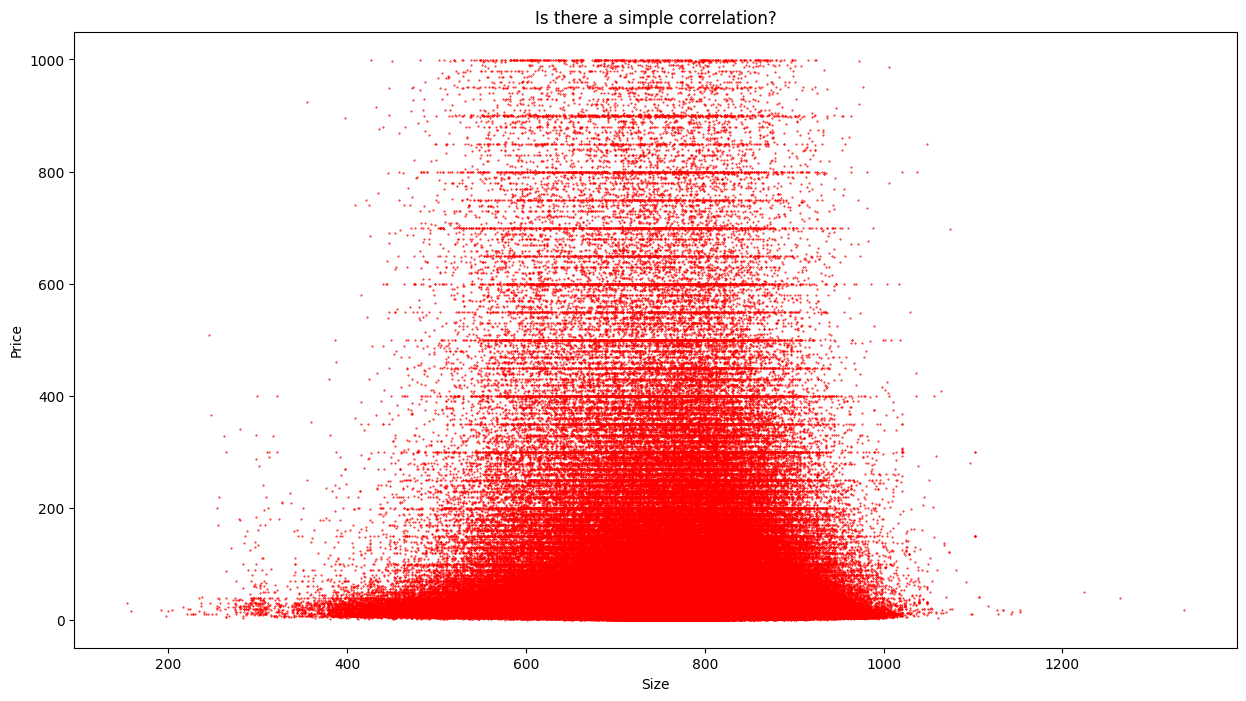

In [7]:
# How does the price vary with the character count of the prompt?

sample = items

sizes = [len(item.prompt) for item in sample]
prices = [item.price for item in sample]

# Create the scatter plot
plt.figure(figsize=(15, 8))
plt.scatter(sizes, prices, s=0.2, color="red")

# Add labels and title
plt.xlabel('Size')
plt.ylabel('Price')
plt.title('Is there a simple correlation?')

# Display the plot
plt.show()

In [8]:
def report(item):
    prompt = item.prompt
    tokens = Item.tokenizer.encode(item.prompt)
    print('prompt:', prompt)
    print('tokens:', tokens[-10:])
    print('tokenizer:', Item.tokenizer.batch_decode(tokens[-10:]))

In [9]:
report(sample[50])

prompt: How much does this cost to the nearest dollar?

Hermitshell Hard Travel Case for Microsoft Surface Slim Pen 1 or 2
Hermitshell Hard Travel Case for Microsoft Surface Slim Pen 1 or 2 Hermitshell Hard Travel Storage Carrying Case. Protect your favorite device from bumps dents and scratches. Made to fit Microsoft Surface Slim Pen 1 or 2. Material EVA.Color Black.Internal size inches. For sale is case only (device and accessories are sold separately). Dimensions 7.72 x 1.93 x 1.22 inches, Weight 1.76 ounces, Rank Tablet Cases 3705, Form Factor Case, Manufacturer Hermitshell, Country of Origin China, Available September 14, 2022, Brand Hermitshell, Shell Type Hard, Material Ethylene Vinyl Acetate,

Price is $15.00
tokens: [6515, 295, 349, 3638, 7117, 374, 400, 868, 13, 410]
tokenizer: [' Ac', 'et', 'ate', ',\n\n', 'Price', ' is', ' $', '15', '.', '00']


## Observation

An interesting thing about the Llama tokenizer is that every number from 1 to 999 gets mapped to 1 token, much as we saw with gpt-4o. The same is not true of qwen2, gemma and phi3, which all map individual digits to tokens. This does turn out to be a bit useful for our project, although it's not an essential requirement.

# Finally

It's time to break down our data into a training, test and validation dataset.

It's typical to use 5%-10% of your data for testing purposes, but actually we have far more than we need at this point. We'll take 25,000 points for training, and we'll reserve 2,000 for testing, although we won't use all of them.


In [11]:
# Original
# random.seed(42)
# random.shuffle(sample)
# train = sample[:25_000]
# test = sample[25_000:27_000]
# print(f"Divided into a training set of {len(train):,} items and test set of {len(test):,} items")

# Make a smaller set
random.seed(42)
random.shuffle(sample)
# train = sample[:500] # Used to train my model
# test = sample[500:2500]

train = sample[:20000] # Needed for week 8
test = sample[20000:22500]

print(f"Divided into a training set of {len(train):,} items and test set of {len(test):,} items")

Divided into a training set of 20,000 items and test set of 2,500 items


In [ ]:
print(train[0].prompt)

In [ ]:
print(test[0].test_prompt())

In [ ]:
# Plot the distribution of prices in the first 250 test points

prices = [float(item.price) for item in test[:250]]
plt.figure(figsize=(15, 6))
plt.title(f"Avg {sum(prices)/len(prices):.2f} and highest {max(prices):,.2f}\n")
plt.xlabel('Price ($)')
plt.ylabel('Count')
plt.hist(prices, rwidth=0.7, color="darkblue", bins=range(0, 1000, 10))
plt.show()

# Finally - upload your brand new dataset

Convert to prompts and upload to HuggingFace hub

In [12]:
train_prompts = [item.prompt for item in train]
train_prices = [item.price for item in train]
test_prompts = [item.test_prompt() for item in test]
test_prices = [item.price for item in test]

In [13]:
# Create a Dataset from the lists

train_dataset = Dataset.from_dict({"text": train_prompts, "price": train_prices})
test_dataset = Dataset.from_dict({"text": test_prompts, "price": test_prices})
dataset = DatasetDict({
    "train": train_dataset,
    "test": test_dataset
})

In [ ]:
# Pushing to hf gives me issues. Edited code to below and it worked (this time)

# No work (need permissions). Do i need anyway?
#DATASET_NAME = "ed-donner/lite-data"
DATASET_NAME = "timbosssds/lite-data3"
#dataset.push_to_hub(DATASET_NAME, private=True)

token = 
dataset.push_to_hub(DATASET_NAME, private=True, token=token)

In [ ]:
# -- Non-Huggging face loaded
# Can i i see the data?
print(len(train))
display(train[0])
print(len(test))

In [ ]:
# -- Huggging face loaded

# 1.0 Log into hf
# from huggingface_hub import login

# # 2.0 Can i i see the data?
# DATASET_NAME = 'timbosssds/lite-data'
# dataset = load_dataset(DATASET_NAME)
# train = dataset['train']
# test = dataset['test']
# print(train[0])



In [14]:
# One more thing!
# Let's pickle the training and test dataset so we don't have to execute all this code next time!

with open('train_lite5.pkl', 'wb') as file:
    pickle.dump(train, file)

with open('test_lite5.pkl', 'wb') as file:
    pickle.dump(test, file)

## Todos for you:

- Investigate the dataset more!
- Confirm that the tokenizer tokenizes all 3 digit prices into 1 token

In [ ]:
# My code...
# Open the pickle file in read-binary mode
# Open the pickle file in binary read mode ('rb')
with open('train_lite.pkl', 'rb') as file:
    data = pickle.load(file)

# Now you can use the 'data' variable
print(len(data))
print(data)